In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (f1_score, confusion_matrix, roc_curve, 
                             roc_auc_score, classification_report)

%matplotlib inline

In [9]:
df_train = pd.read_csv("train.csv")
df_test  = pd.read_csv("test.csv").drop(columns="NU_INSCRICAO")

In [10]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [11]:
df_test.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,43,RS,19,F,1,1,1,3,1,NaN,...,NaN,NaN,E,E,H,B,B,C,D,A
1,15,PA,24,M,3,2,1,4,1,NaN,...,NaN,NaN,B,C,B,A,A,C,D,A
2,29,BA,16,F,2,1,3,0,1,NaN,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,41,PR,17,F,1,1,2,0,2,1.0,...,40.0,480.0,E,E,E,C,B,B,C,A
4,53,DF,19,F,1,1,1,1,1,NaN,...,80.0,720.0,E,E,E,B,B,B,D,A


In [13]:
print(df_train.shape, df_test.shape)

(13730, 167) (4570, 42)


# Selecting only the test features

In [17]:
# Limitando o data frame de treino às features disponíveis nos dados de teste.
features = df_test.columns.to_list()

df_train = df_train[features + ["IN_TREINEIRO"]]

df_train.columns

Index(['CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN',
       'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024',
       'Q025', 'Q026', 'Q027', 'Q047', 'IN_TREINEIRO'],
      dtype='object')

# Data description

In [19]:
df_train.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,IN_TREINEIRO
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,4282.000000,13730.000000,...,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,13730.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,2.259692,0.001238,...,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,0.129862
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.698586,0.035167,...,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,0.336163
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,0.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,0.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,...,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,0.000000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,...,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,1.000000


In [27]:
df_test.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,4570.000000,1426.000000,1426.000000,4570.000000,...,3458.000000,3400.000000,4570.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,31.029322,21.545295,2.176586,1.046827,1.767615,2.172867,1.357987,1.166199,2.286115,0.002188,...,528.615818,516.102471,0.609190,1.090000,118.988824,111.599118,106.130882,112.402941,76.376471,525.498235
std,9.901375,6.790798,0.996656,0.245769,0.871374,3.250585,0.567280,0.546511,0.721239,0.046732,...,73.278207,69.141624,0.487985,0.668384,29.067885,33.150519,33.553963,32.801291,43.295267,151.640060
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,479.525000,469.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,531.200000,521.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,520.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,0.000000,...,580.975000,564.825000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,63.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,4.000000,1.000000,...,750.700000,730.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,960.000000


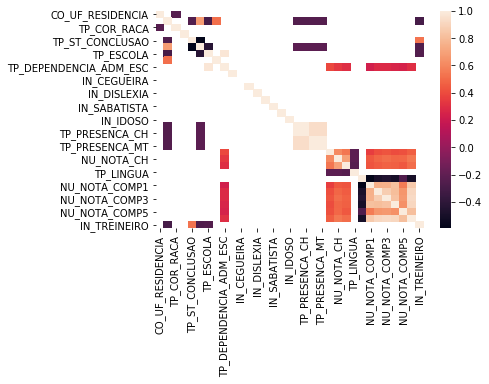

In [30]:
sns.heatmap(df_train.corr()[abs(df_train.corr()) > 0.2])

In [25]:
nan_test = df_test.isna().sum() / df_test.shape[0]
nan_test[nan_test > 0]

TP_ENSINO                 0.687965
TP_DEPENDENCIA_ADM_ESC    0.687965
NU_NOTA_CN                0.243326
NU_NOTA_CH                0.243326
NU_NOTA_LC                0.256018
TP_STATUS_REDACAO         0.256018
NU_NOTA_COMP1             0.256018
NU_NOTA_COMP2             0.256018
NU_NOTA_COMP3             0.256018
NU_NOTA_COMP4             0.256018
NU_NOTA_COMP5             0.256018
NU_NOTA_REDACAO           0.256018
Q027                      0.533260
dtype: float64

In [26]:
nan_train = df_train.isna().sum() / df_train.shape[0]
nan_train[nan_train > 0]

TP_ENSINO                 0.688128
TP_DEPENDENCIA_ADM_ESC    0.688128
NU_NOTA_CN                0.246832
NU_NOTA_CH                0.246832
NU_NOTA_LC                0.261981
TP_STATUS_REDACAO         0.261981
NU_NOTA_COMP1             0.261981
NU_NOTA_COMP2             0.261981
NU_NOTA_COMP3             0.261981
NU_NOTA_COMP4             0.261981
NU_NOTA_COMP5             0.261981
NU_NOTA_REDACAO           0.261981
Q027                      0.536999
dtype: float64

# Drop columns with > 50% nan

In [31]:
df_test.drop(columns=["TP_DEPENDENCIA_ADM_ESC", "TP_ENSINO", "Q027"], inplace=True)
df_train.drop(columns=["TP_DEPENDENCIA_ADM_ESC", "TP_ENSINO", "Q027"], inplace=True)

In [32]:
# Preenchendo os demais valores faltantes com (-1). Modelos de árvore vão tratar diferentemente do restante dos dados
df_test.fillna(-1, inplace=True)
df_train.fillna(-1, inplace=True)

# Balance of the data

In [39]:
df_train['IN_TREINEIRO'].value_counts() / df_train['IN_TREINEIRO'].shape[0]

0    0.870138
1    0.129862
Name: IN_TREINEIRO, dtype: float64

# Preparing data to Smote

In [94]:
x_train = df_train.drop(columns="IN_TREINEIRO", errors="ignore")
y_train = df_train["IN_TREINEIRO"]

x_test = df_test.copy()

In [95]:
siglas_categoricas = ["CO", "SG", "TP", "IN", "Q0"]
cat_features = [i for i in x_train.columns if i[:2] in siglas_categoricas]
num_features = x_train.columns.drop(cat_features)

# One hot enc

In [96]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=np.int)

ohe.fit(x_train[cat_features])

x_train_encoded = ohe.transform(x_train[cat_features])
x_test_encoded  = ohe.transform(df_test[cat_features])

x_train_encoded = pd.DataFrame(x_train_encoded, columns=ohe.get_feature_names(cat_features))
x_train_encoded = pd.concat([x_train_encoded, x_train[num_features].reset_index(drop=True)], axis=1)

x_test_encoded = pd.DataFrame(x_test_encoded, columns=ohe.get_feature_names(cat_features))
x_test_encoded = pd.concat([x_test_encoded, x_test[num_features].reset_index(drop=True)], axis=1)

# Smote

In [97]:
smote = SMOTE(sampling_strategy="minority")

x_train_balan, y_train = smote.fit_resample(x_train_encoded, y_train)

In [98]:
# Pefect balance
y_train.sum() / y_train.shape[0]

0.5

# Feature selection (Random forest)

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x_train_balanceado, y_train, 
                                                       test_size=0.3, random_state=42) 

In [100]:
clf_rf = RandomForestClassifier(random_state=1)
clf_rf.fit(x_train, y_train)

selection_features = pd.DataFrame()
selection_features["features"] = x_train.columns
selection_features["importancia"] = clf_rf.feature_importances_

selection_features = selection_features[selection_features["importancia"] > np.mean(selection_features["importancia"])].sort_values("importancia", ascending=False)
selection_features.reset_index(drop=True, inplace=True)

x_train_importance = x_train[selection_features["features"]]
x_test_importance = x_test[selection_features["features"]]
selection_features

,features,importancia
0,TP_ST_CONCLUSAO_3,0.238908
1,NU_IDADE,0.173140
2,TP_ANO_CONCLUIU_0,0.087927
3,TP_ESCOLA_1,0.085849
4,TP_ST_CONCLUSAO_1,0.073897
5,TP_ST_CONCLUSAO_2,0.057098
6,TP_ESCOLA_2,0.052277
7,Q026_B,0.030516
8,Q026_C,0.026187
9,Q026_A,0.020845


In [101]:
features_selected = selection_features["features"].values
features_selected

array(['TP_ST_CONCLUSAO_3', 'NU_IDADE', 'TP_ANO_CONCLUIU_0',
       'TP_ESCOLA_1', 'TP_ST_CONCLUSAO_1', 'TP_ST_CONCLUSAO_2',
       'TP_ESCOLA_2', 'Q026_B', 'Q026_C', 'Q026_A', 'TP_ANO_CONCLUIU_1',
       'Q001_B', 'TP_ST_CONCLUSAO_4', 'Q024_B', 'TP_SEXO_M'], dtype=object)

# Model training and valiation

In [102]:
def plot_roc_curve(fpr, tpr, predics, label):
    plt.title("ROC Curve", fontsize=20)
    plt.ylabel("TPR or Sensitivity", fontsize=20)
    plt.xlabel("FPR or (1 - specificity)", fontsize=20)
    plt.plot(fpr, tpr, label=f"{label}")
    plt.plot([0, 1], [0, 1], ls="--", color="r", label="Sorte")
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.show()
    
    print(classification_report(y_test, predics))
    print(f"AUC: {roc_auc_score(y_test, predics)}")
    
    
def plot_confusion_matrix(y_test, predict, title):
    plt.figure(figsize=(6, 6))
    conf_matrix = confusion_matrix(y_test, predict)
    sns.heatmap(conf_matrix, cmap="YlGnBu", annot=True, fmt="d", cbar=False)
    plt.xlabel("Predicted", fontsize=20, labelpad=15)
    plt.ylabel("Real", fontsize=20, labelpad=15)
    plt.xticks(ticks=[0.5, 1.5] ,labels=["Não-treineiro", "Treineiro"], fontsize=16)
    plt.yticks(ticks=[0.25 , 1.25] ,labels=["Não-treineiro", "Treineiro"], fontsize=16)
    plt.show()

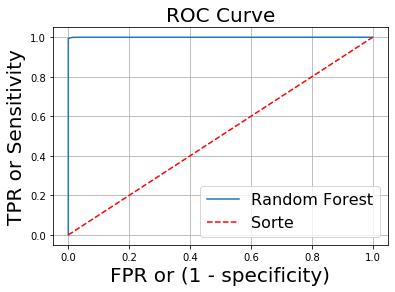

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3563
           1       1.00      0.99      1.00      3606

    accuracy                           1.00      7169
   macro avg       1.00      1.00      1.00      7169
weighted avg       1.00      1.00      1.00      7169

AUC: 0.9968108707709373


In [103]:
clf_rf.fit(x_train[features_selected[:-1]], y_train)
predict_rf = clf_rf.predict(x_test[features_selected[:-1]])

y_score_rf = clf_rf.predict_proba(x_test[features_selected[:-1]])[:,1]
fpr, tpr, treshold = roc_curve(y_test, y_score_rf)

plot_roc_curve(fpr, tpr, predict_rf, "Random Forest")

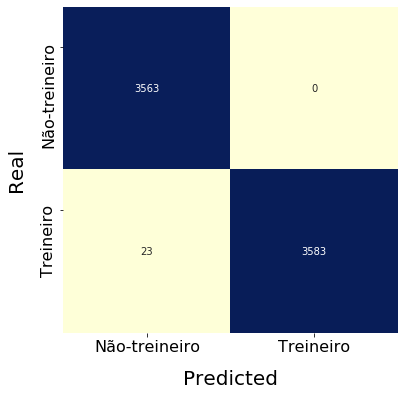

In [104]:
plot_confusion_matrix(y_test, predict_rf, "Random Forest")

In [105]:
clf_RF = RandomForestClassifier(random_state=42)
clf_RF.fit(x_train[features_selected], y_train)
predict = clf_RF.predict(x_test_encoded[features_selected])

predict = pd.Series(predict, name="IN_TREINEIRO")
df = pd.read_csv("test.csv")[["NU_INSCRICAO"]]
answer = pd.concat([df, predict], axis=1)
answer.to_csv("answer.csv", index=False)
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0


# Training with all data!

In [89]:
x_train = df_train.drop(columns="IN_TREINEIRO", errors="ignore")
y_train = df_train["IN_TREINEIRO"]

x_test = df_test.copy()

In [90]:
siglas_categoricas = ["CO", "SG", "TP", "IN", "Q0"]
cat_features = [i for i in x_train.columns if i[:2] in siglas_categoricas]
num_features = x_train.columns.drop(cat_features)

In [91]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=np.int)

ohe.fit(x_train[cat_features])

x_train_encoded = ohe.transform(x_train[cat_features])
x_test_encoded  = ohe.transform(df_test[cat_features])

x_train_encoded = pd.DataFrame(x_train_encoded, columns=ohe.get_feature_names(cat_features))
x_train_encoded = pd.concat([x_train_encoded, x_train[num_features].reset_index(drop=True)], axis=1)

x_test_encoded = pd.DataFrame(x_test_encoded, columns=ohe.get_feature_names(cat_features))
x_test_encoded = pd.concat([x_test_encoded, x_test[num_features].reset_index(drop=True)], axis=1)

In [92]:
smote = SMOTE(sampling_strategy="minority")

x_train_balan, y_train = smote.fit_resample(x_train_encoded, y_train)

In [93]:
clf_RF = RandomForestClassifier(random_state=42)
clf_RF.fit(x_train_balan[features_selected], y_train)
predict = clf_RF.predict(x_test_encoded[features_selected])

predict = pd.Series(predict, name="IN_TREINEIRO")
df = pd.read_csv("test.csv")[["NU_INSCRICAO"]]
answer = pd.concat([df, predict], axis=1)
answer.to_csv("answer.csv", index=False)
answer

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
...,...,...
4565,361b7fcd8867119550fe2af5aa729ffad89a7cf5,0
4566,d8a0e4c9e29494cc9bba2422bd79333931475ee1,0
4567,3f1c3388244df8d6521e983a809292d9f3bca643,0
4568,1778e9c4cef591beb6b986d191d15ed05de816b0,0
